<a href="https://colab.research.google.com/github/Rex60309/Generative_AI/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **訓練過程**

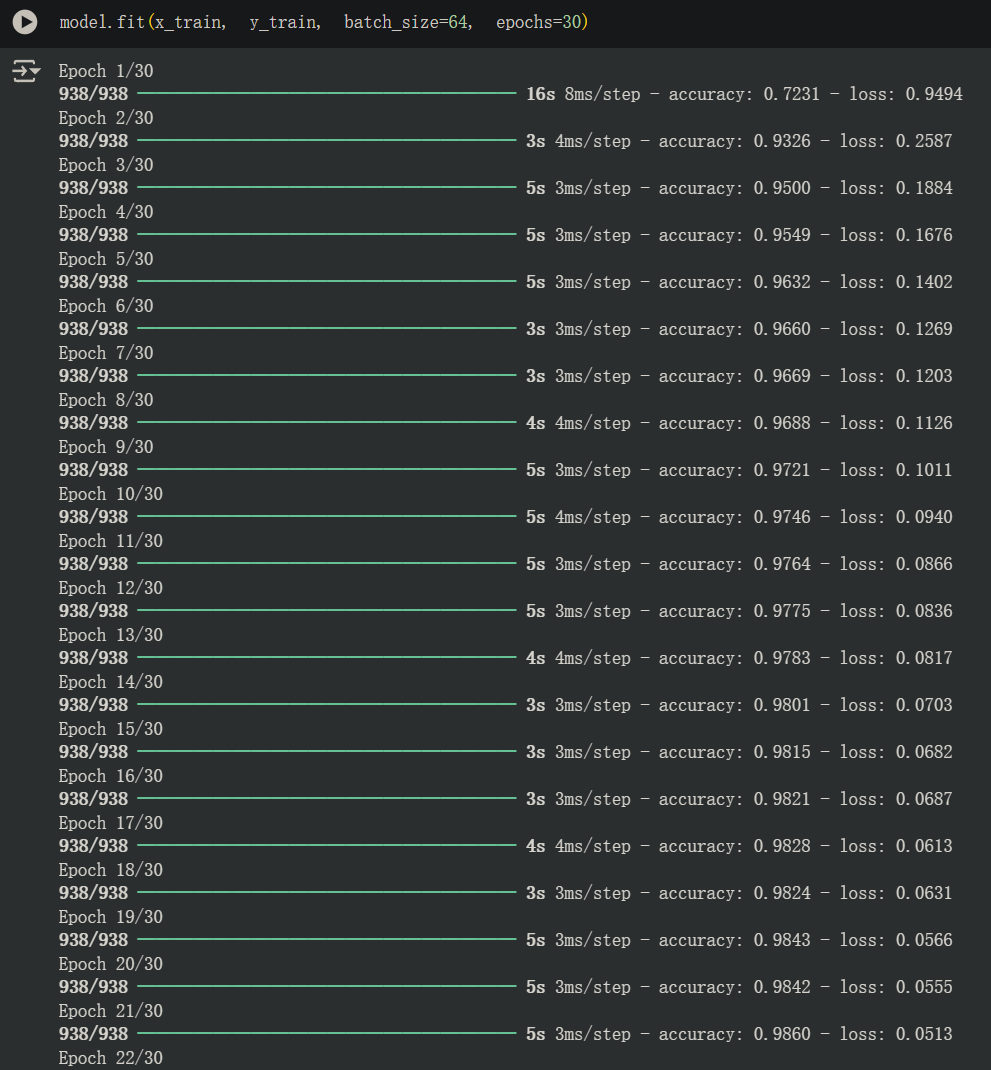

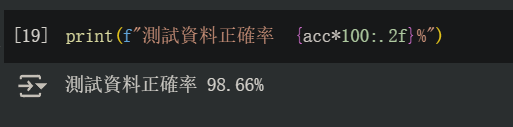

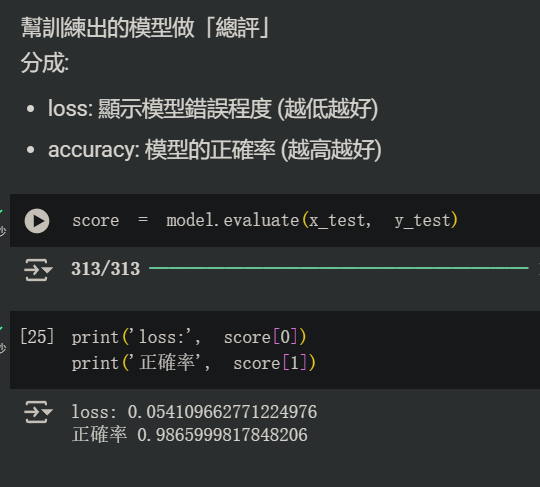

# **測試成果**

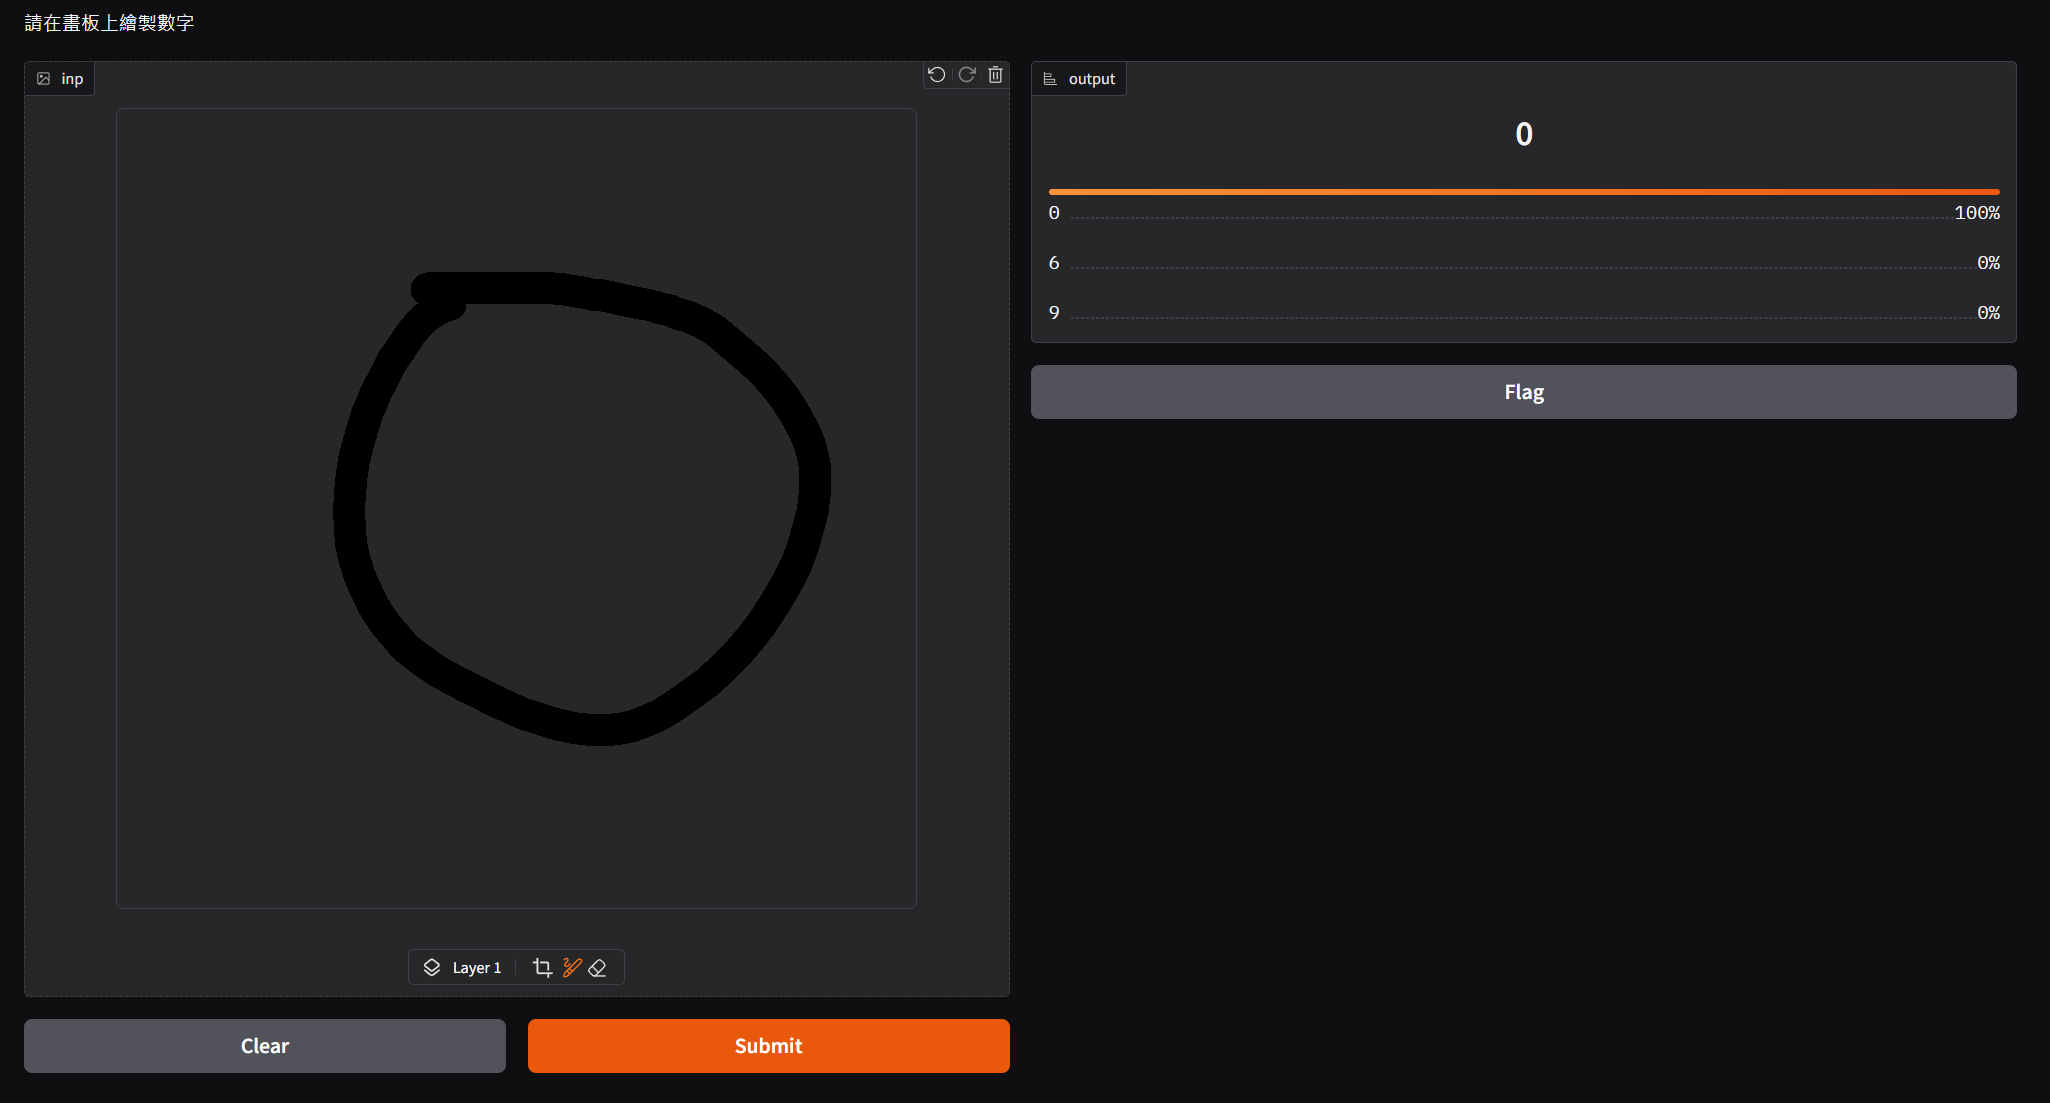

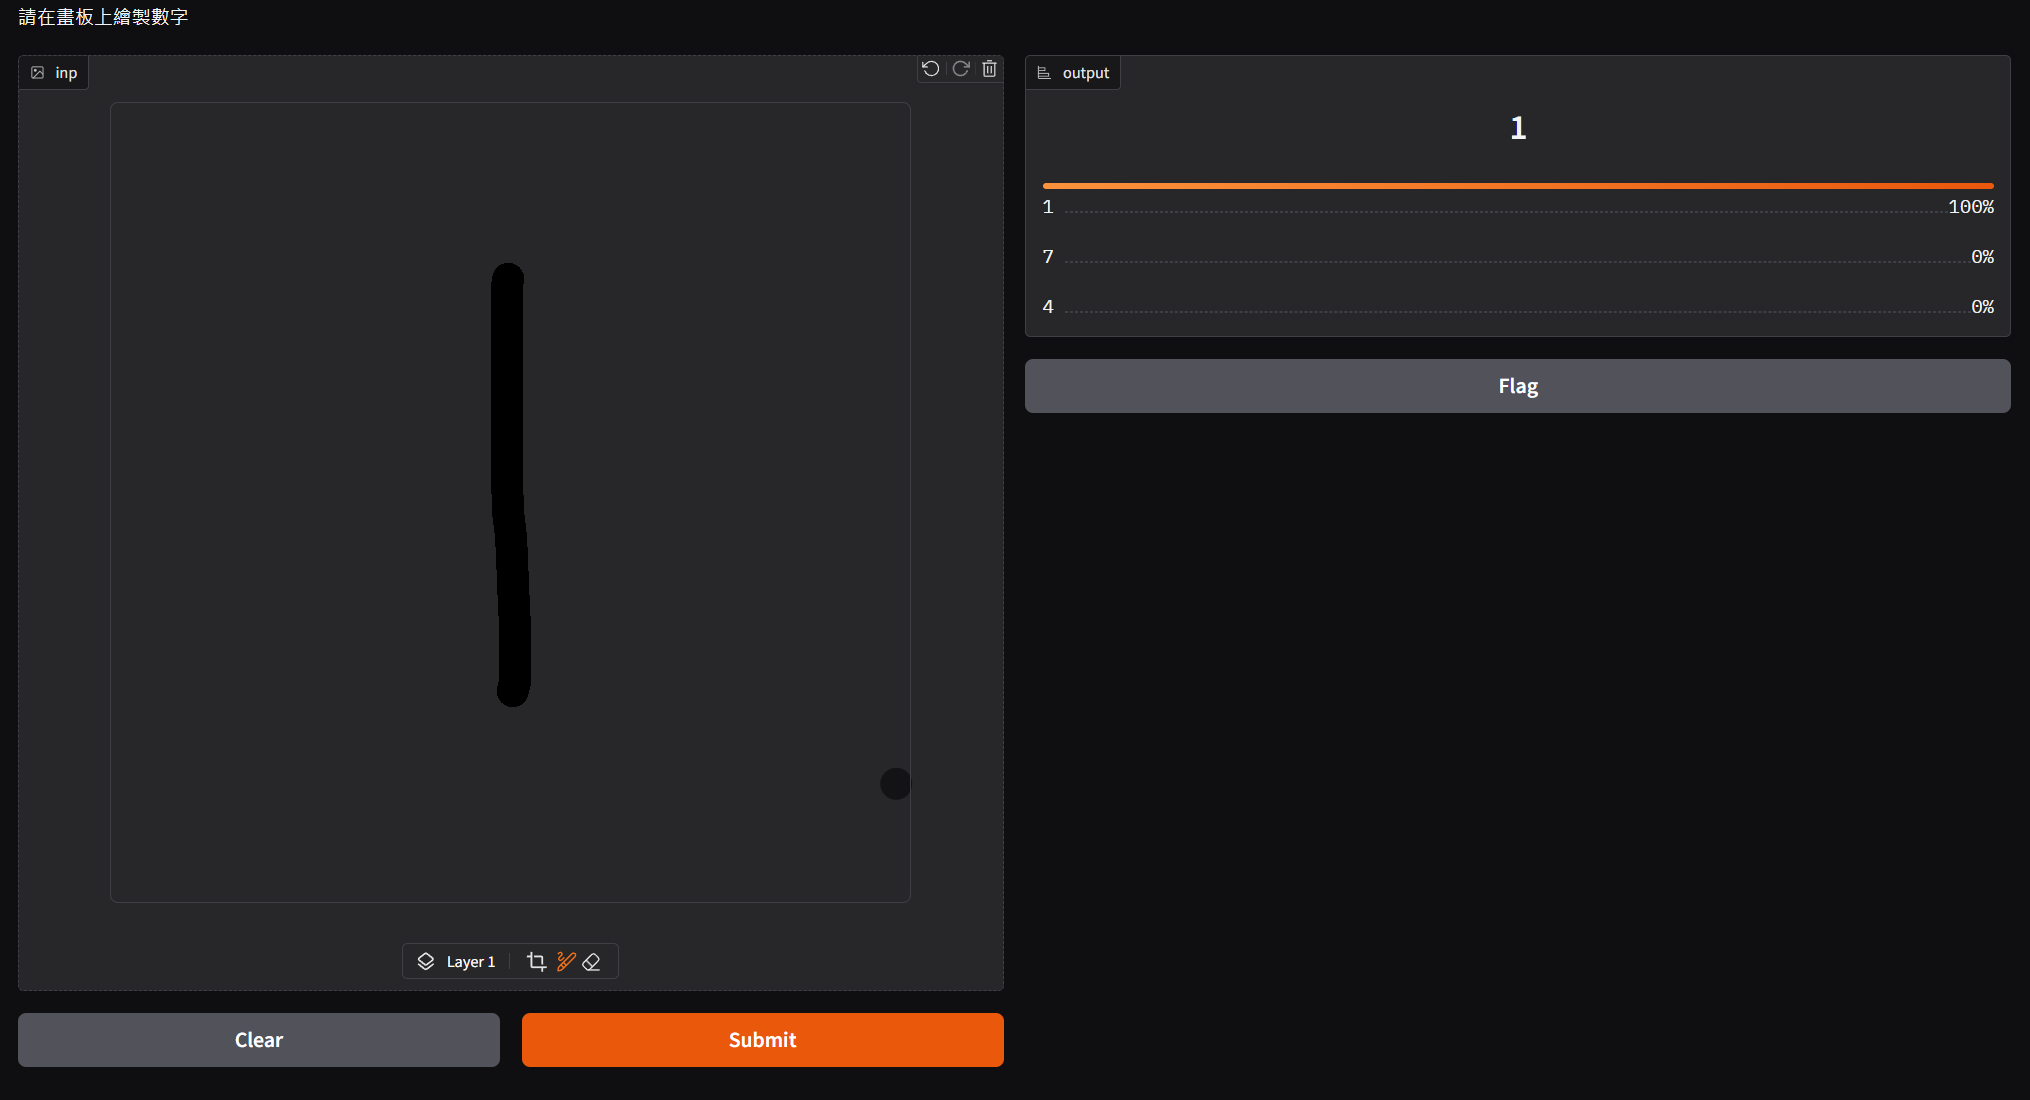

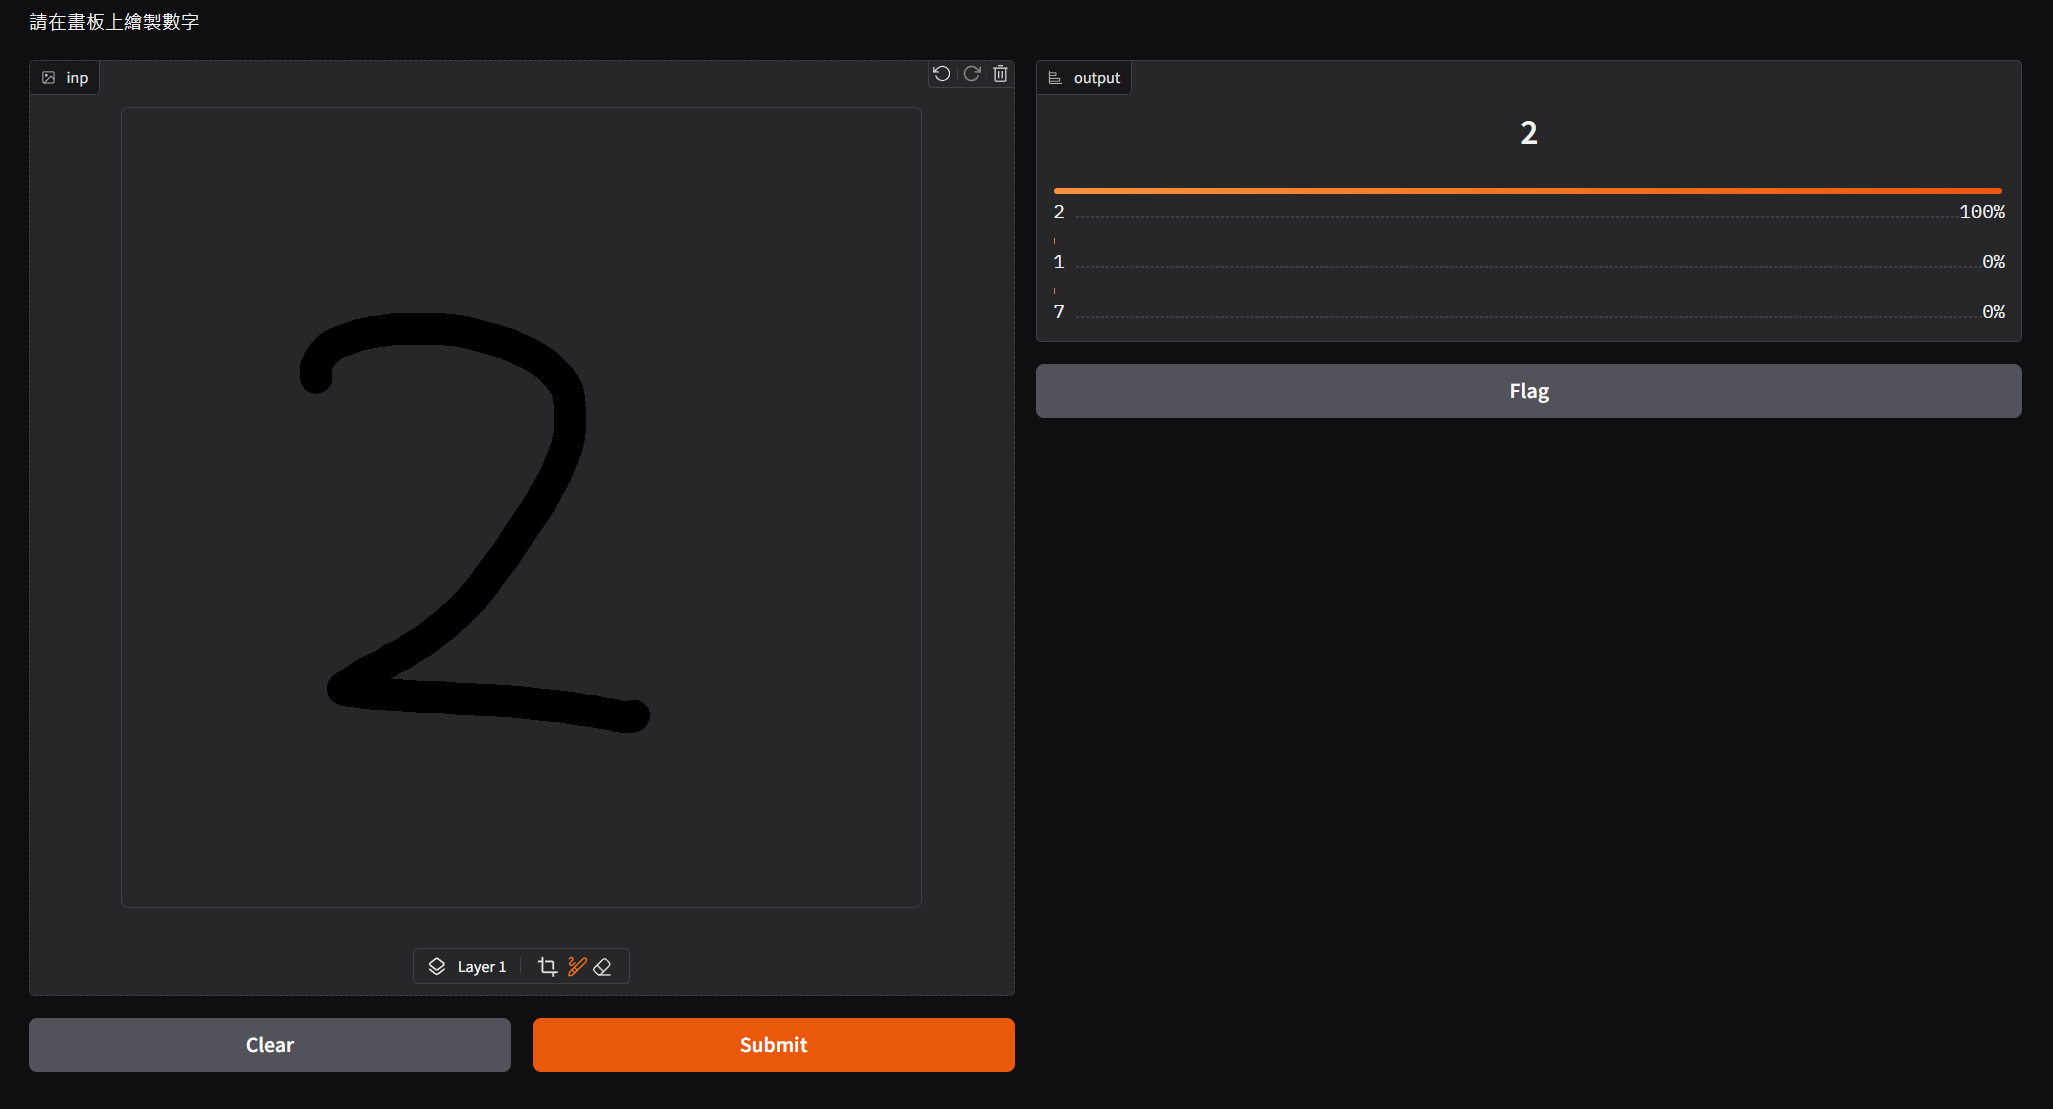

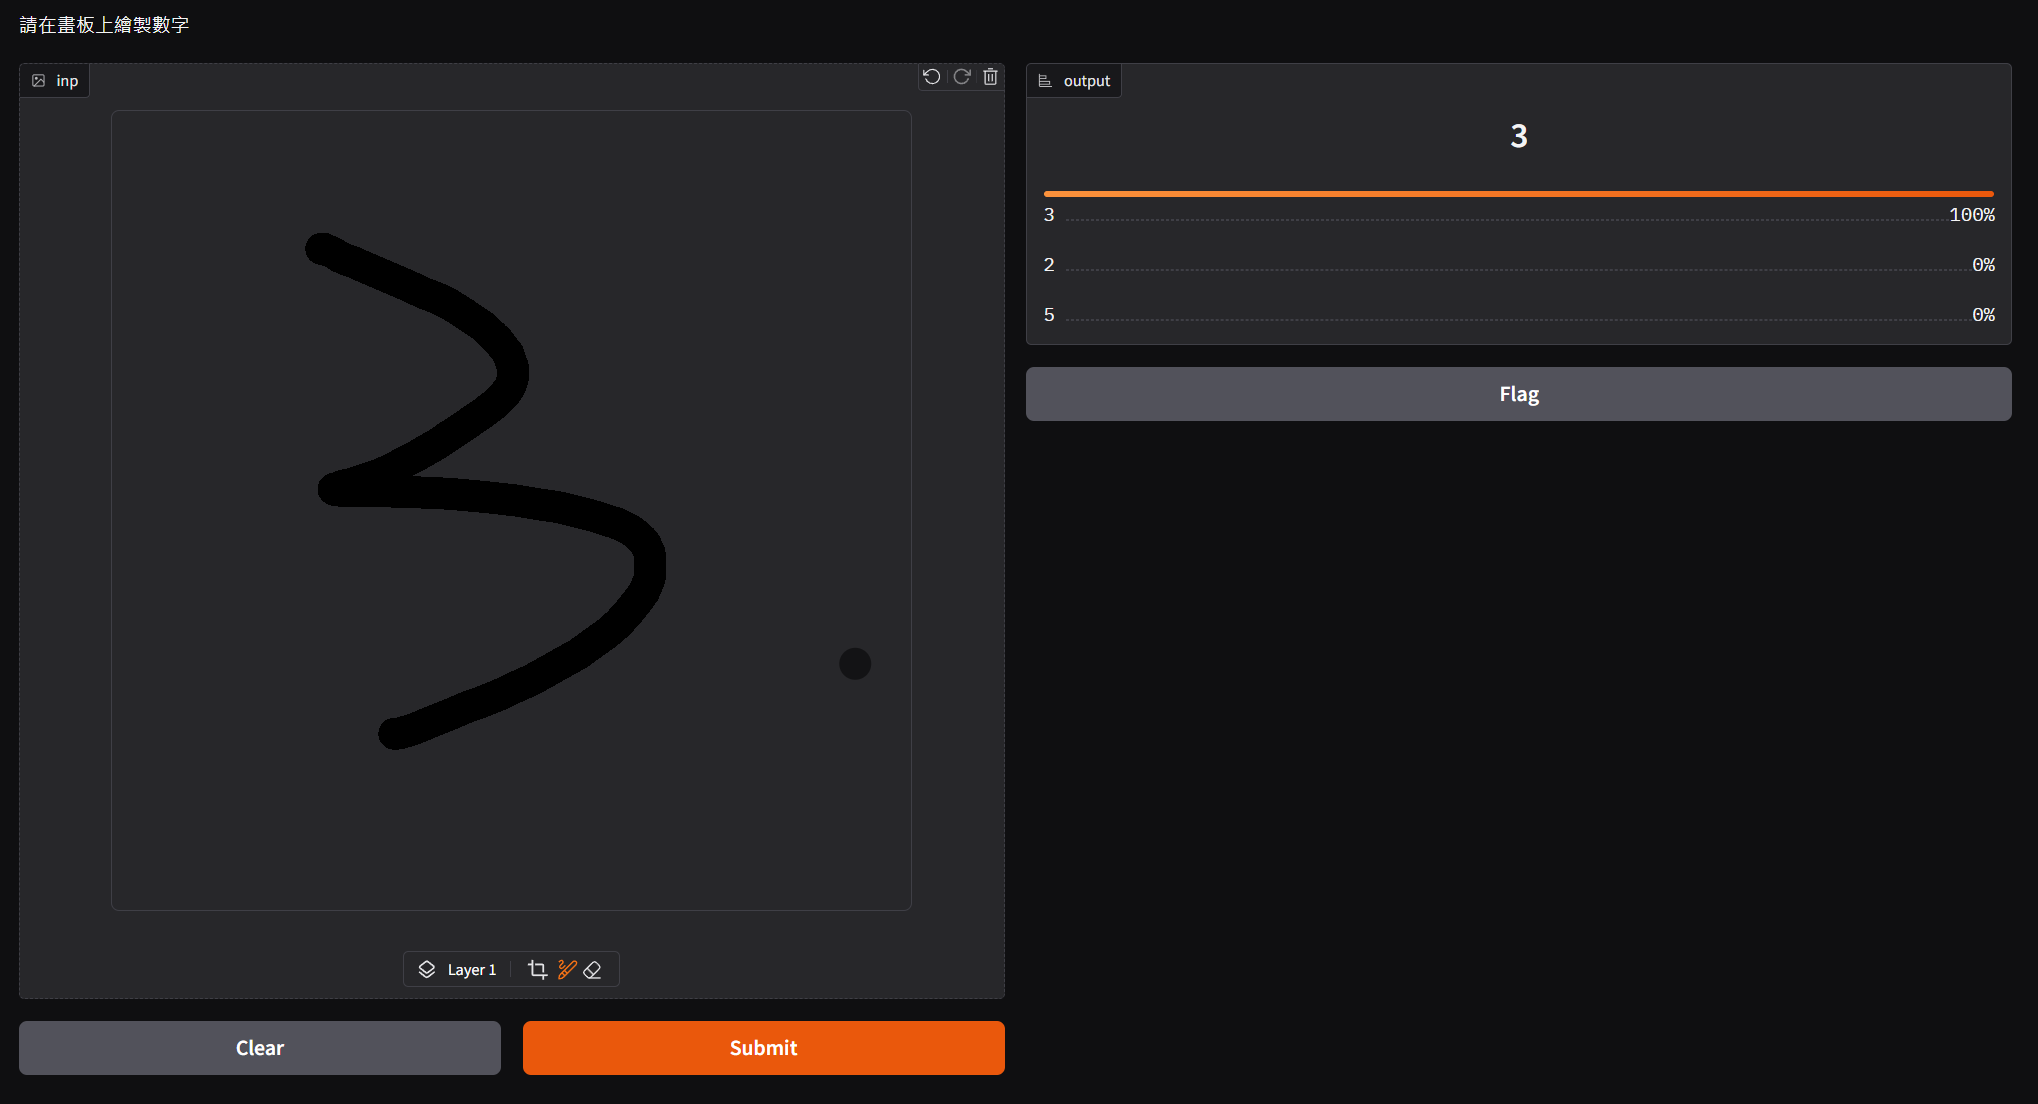

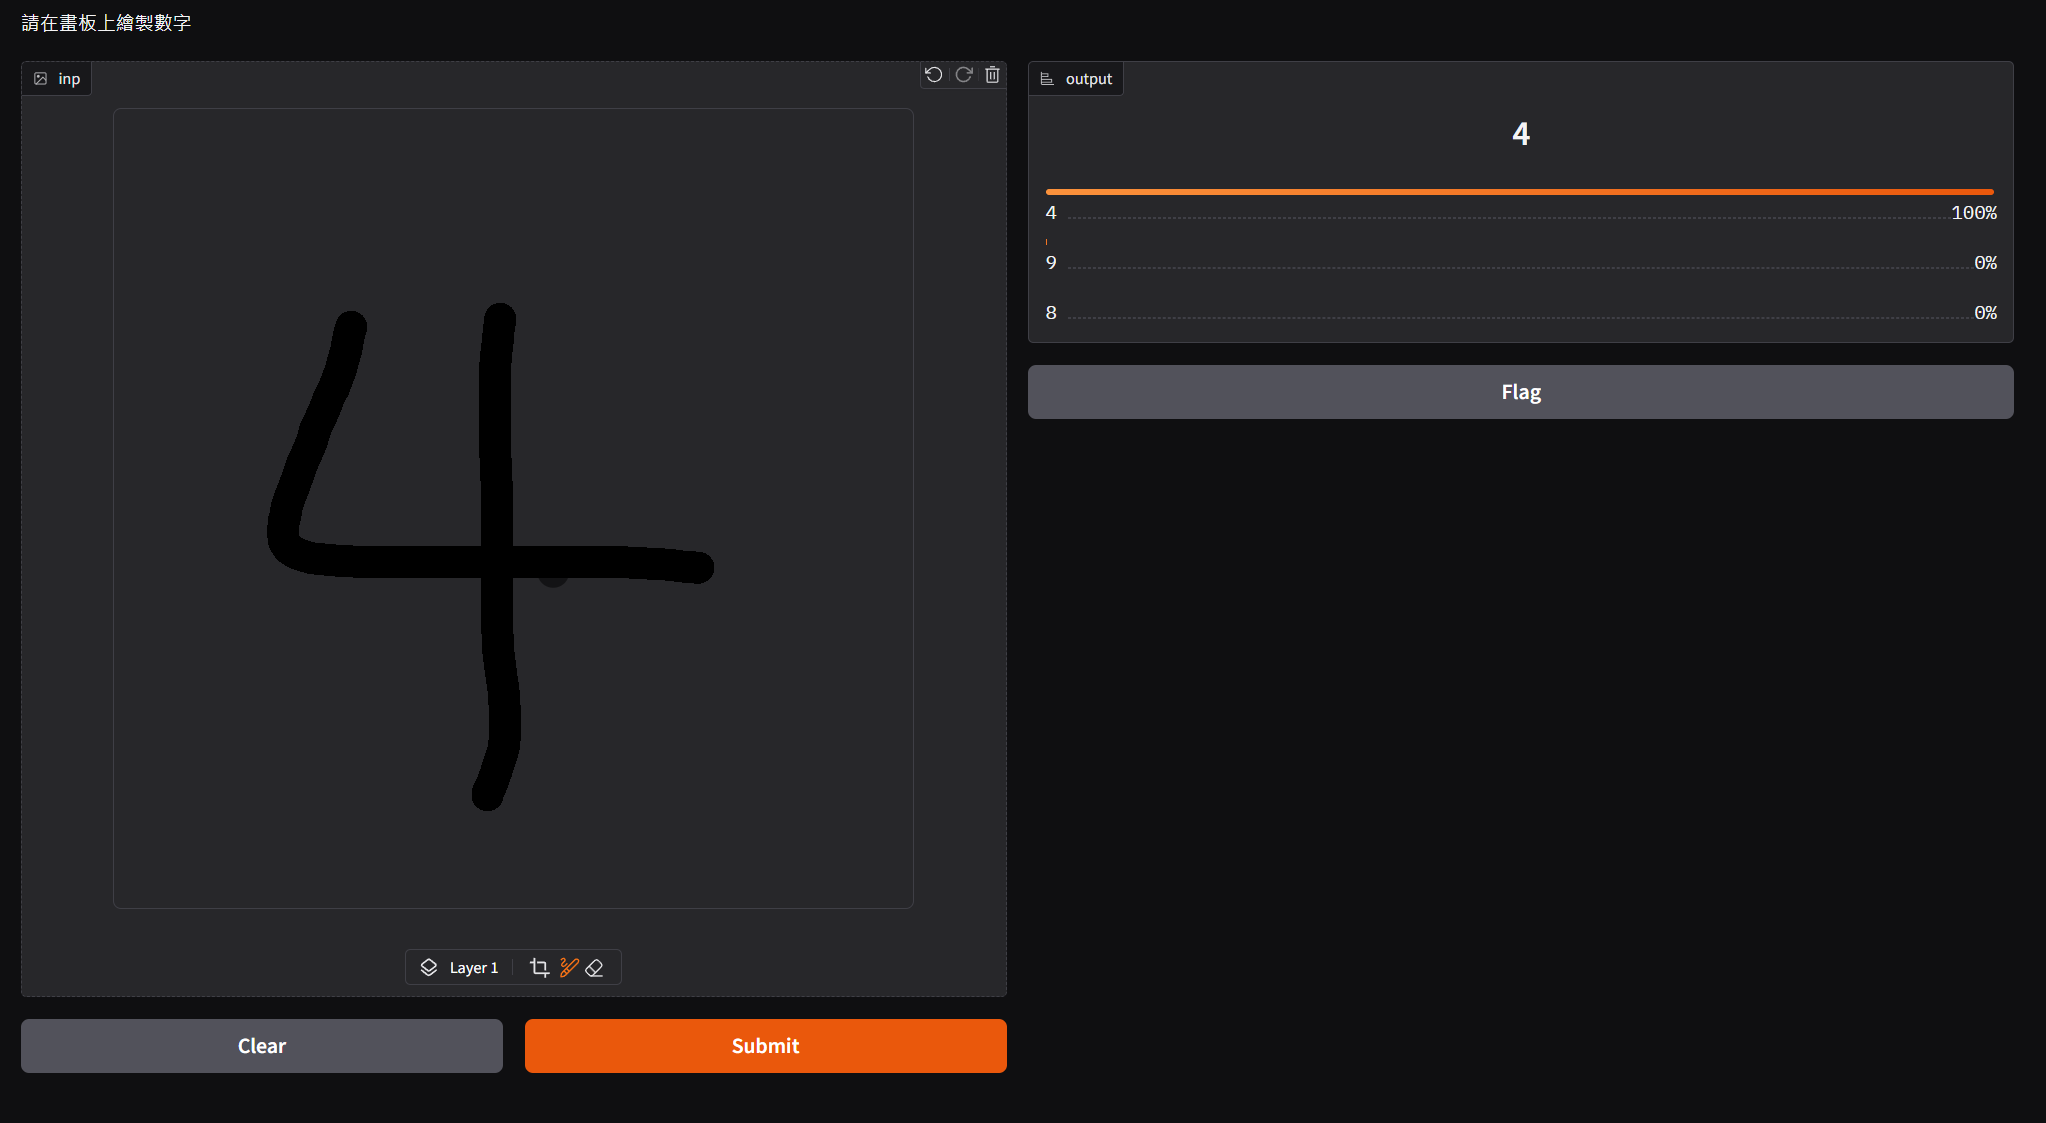

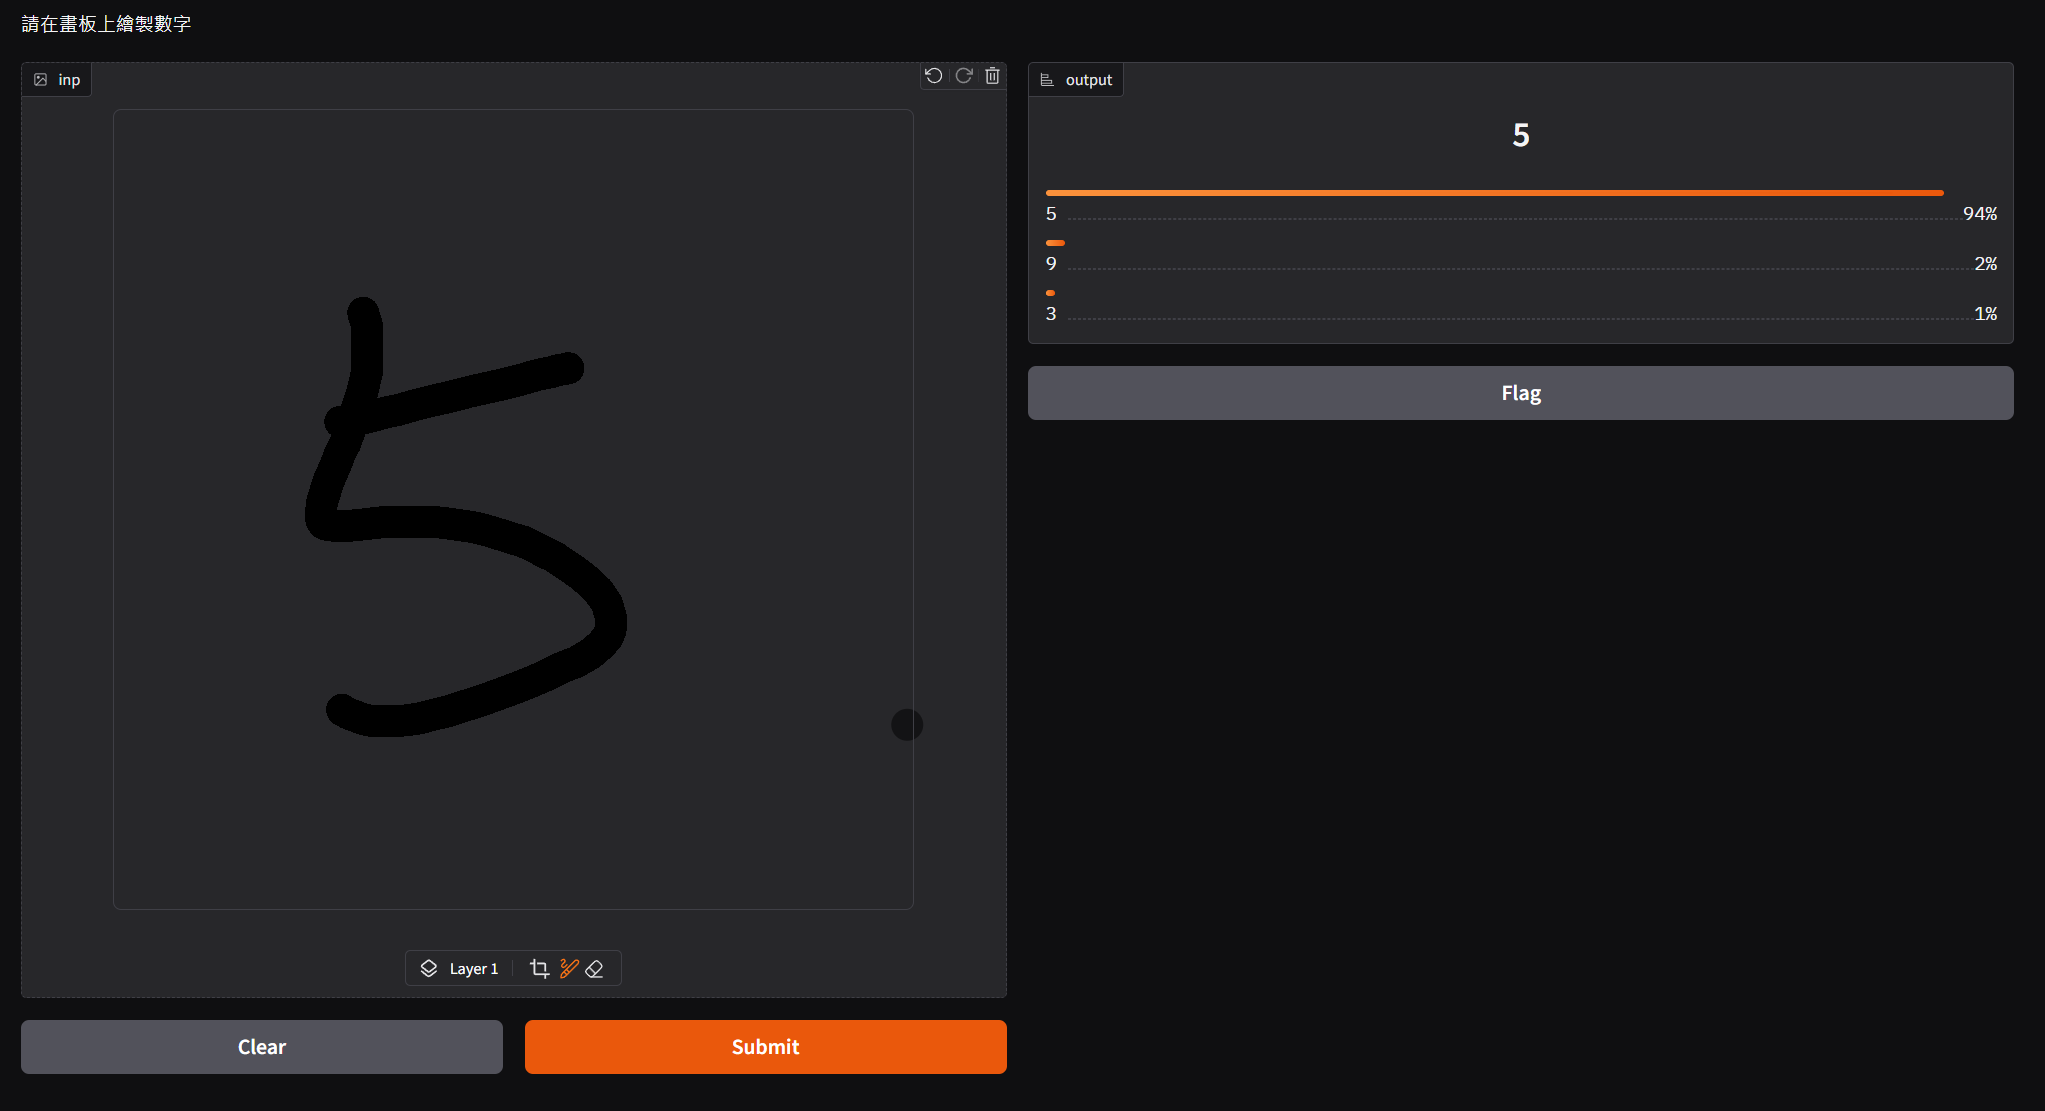

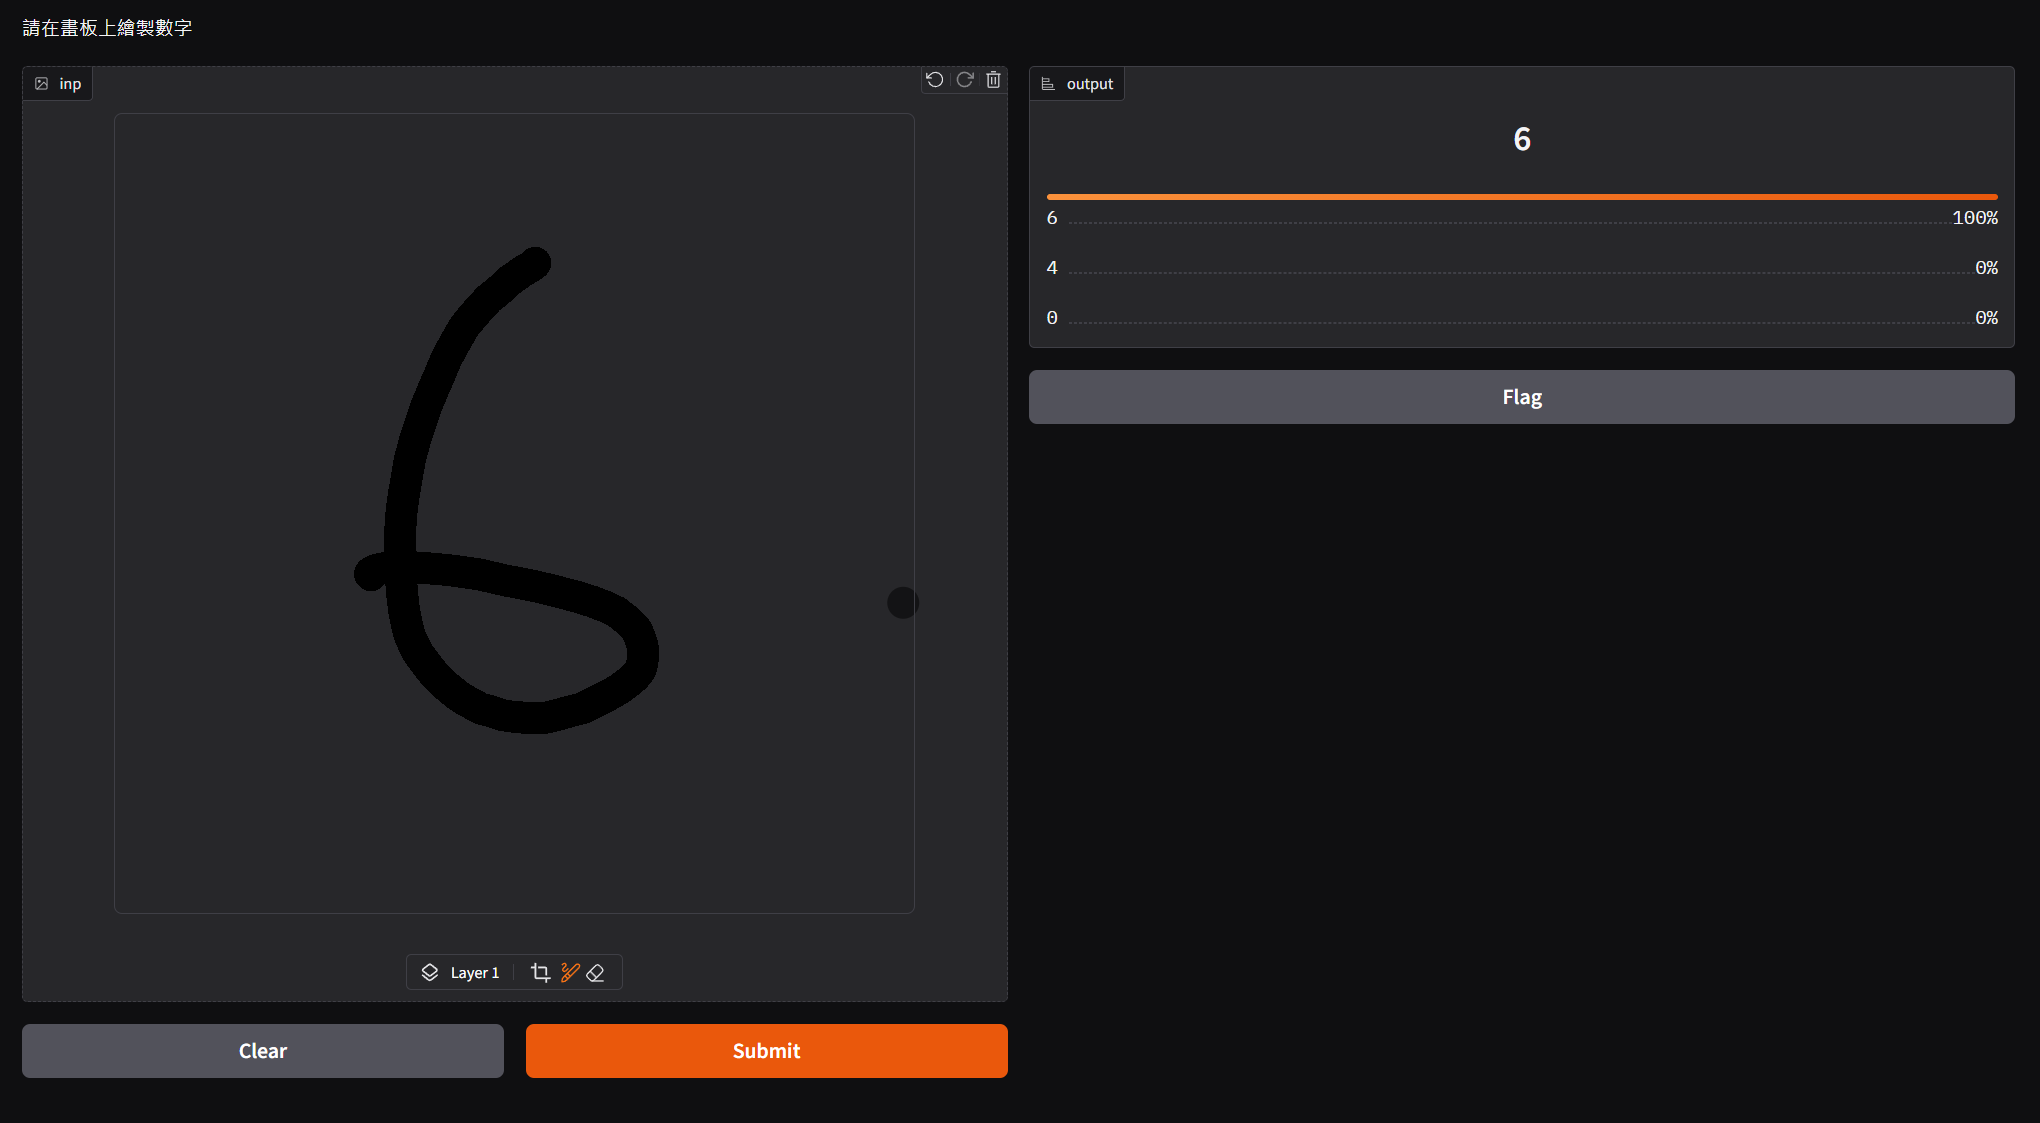

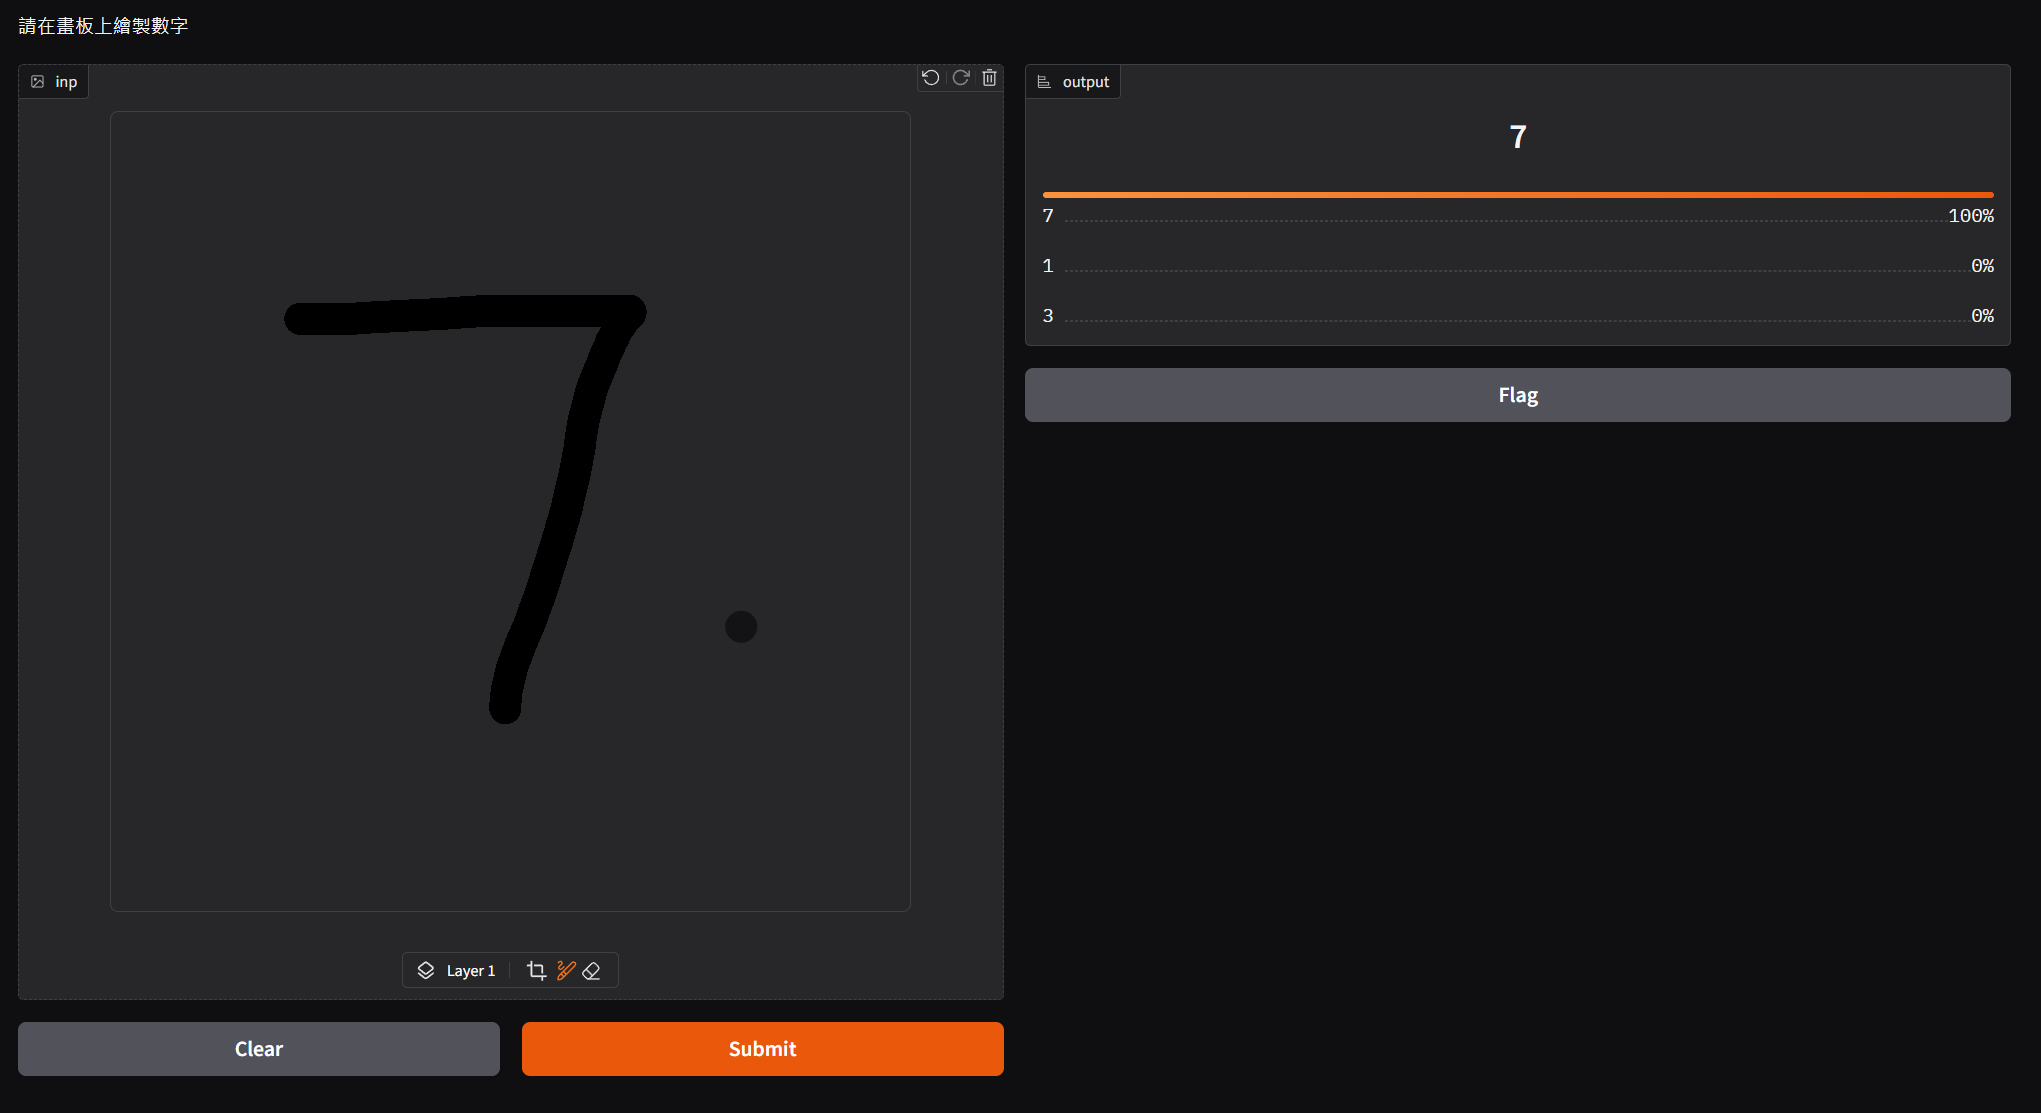

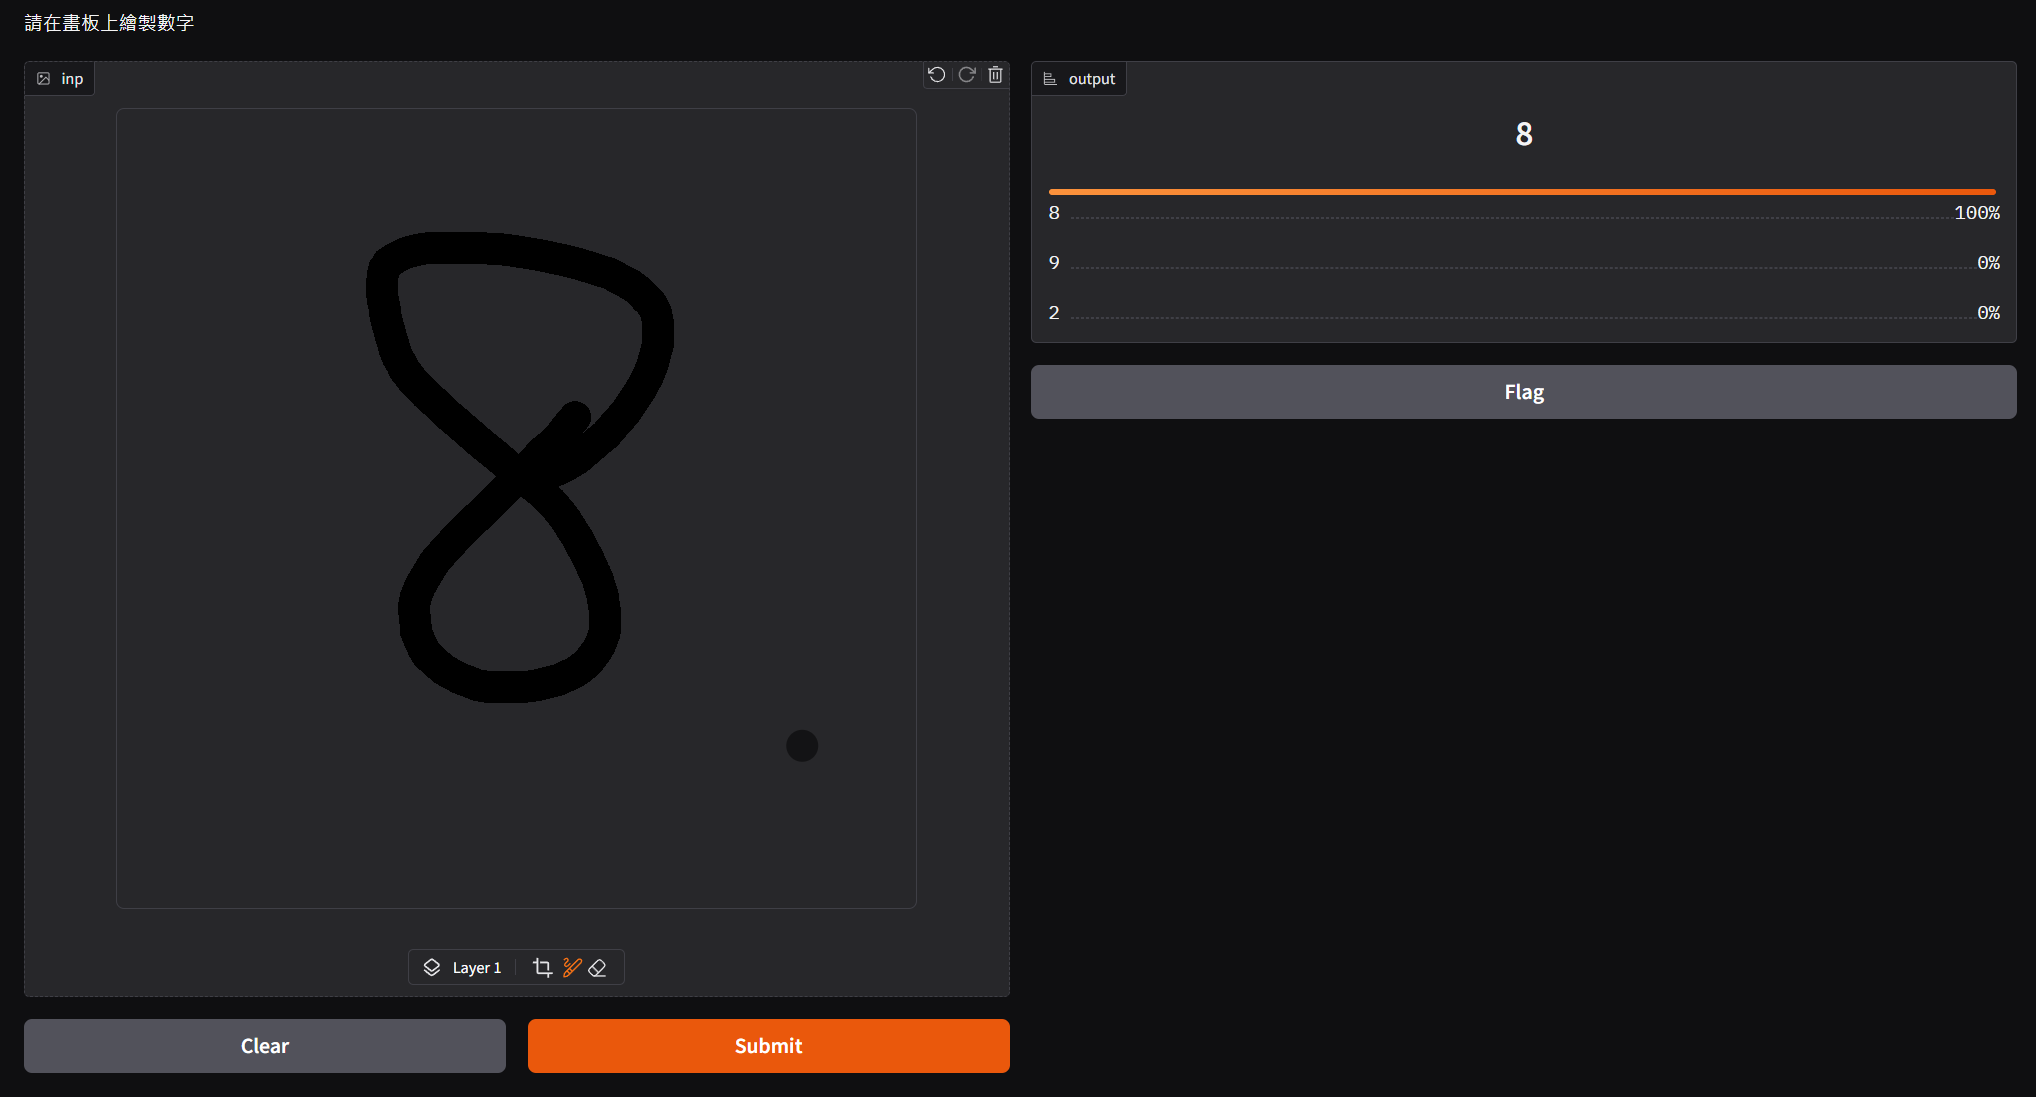

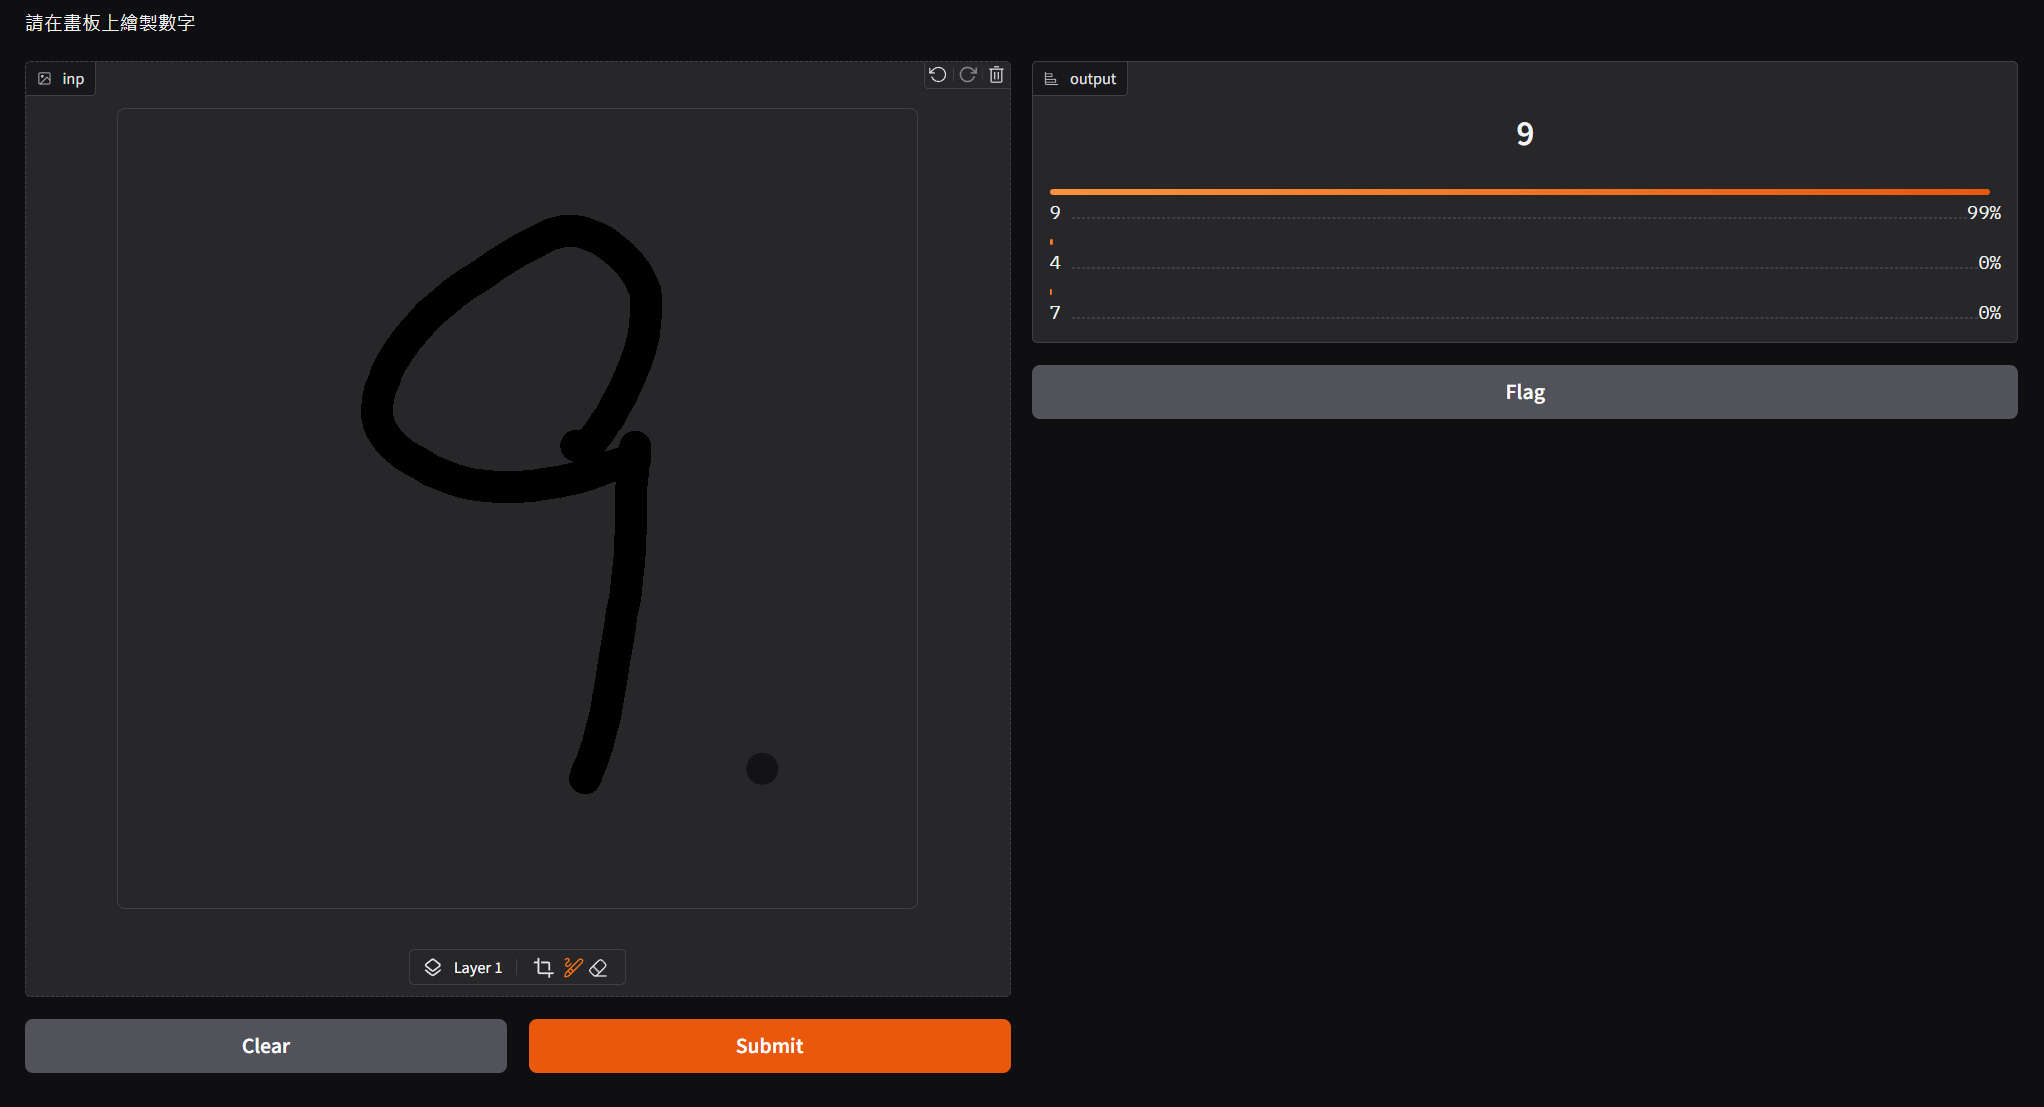

### 能看出在以上測試中, 該模型皆能以近乎完全準確的命中率辨識出正確數字

# **DNN(全連結)手寫辨識**

* 我這次設計了 5 層深度學習, 神經元數量從 512 → 256 → 128 → 64 → 32 依每層遞減，讓模型逐步抽取重要特徵。
* 避免所有層數神經元一樣多，導致模型不夠靈活。

In [ ]:
N1 = 512
N2 = 256
N3 = 128
N4 = 64
N5 = 32

## 1. 讀入所需套件

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
%matplotlib inline

# 標準數據分析、畫圖
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam

# 互動設計
from ipywidgets import interact_manual

# Gradio
import gradio as gr

## 2. 讀入 MNIST 數據庫

### 由 Keras 讀入 MNIST

將讀入的 MNIST 數據庫資料分為 x_train, y_train, x_test, y_test
* x_train: 訓練集的圖片資料 (影像特徵)
* y_train: 訓練集的標籤 (正確答案)
* x_test: 測試集的圖片資料 (影像特徵)
* y_test: 測試集的標籤 (正確答案)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


* 總共的訓練資料量應為 60,000 筆
* 總共的測試資料量應為 10,000 筆

In [ ]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


### 輸入格式整理

* 用 `reshape` 將 28x28 的矩陣重塑成 784 維的向量, 讓全連接神經網路 (Dense 層) 能處理。
* 除以 255 用意是將數據標準化，讓像素值從 0-255 轉換為 0-1, 提升模型學習效果。

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

### 輸出格式整理
運用 `One-Hot encoding` 技術, 讓神經網路能正確處理分類問題。
<br>
例如:
* 1 → [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
* 5 → [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

用 **to_categorical()** 達成



In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. 打造神經網路

### 建構神經網路

* 呼叫 `Sequential`, 層層傳遞的神經網路

In [ ]:
model = Sequential()

* 每次都用 `add` 去加一層, 從第一個隱藏層 (N1) 開始
* 而 N1 因為 TensorFlow 不知道輸入有幾個 features, 所以第一次要 input features數量 (784)

我更改了激活函數、加入 Batch Normalization、適量關閉一些神經元
* 激活函數由 relu 改成 LeakyReLU , 避免「神經元死亡」問題
** 因為 LeakyReLU 在輸入為負值時仍有微小輸出, 不會讓神經元完全失效
* 在每層 Dense 之後加上 BatchNormalization()
** 使其加快訓練速度, 讓梯度在深層網路中更穩定
* 適量 Dropout 防止過擬合
** 較大的層關閉較多 ； 反之, 關閉較少

In [ ]:
# Layer 1
model.add(Dense(N1, input_dim=784))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01)) # 使其在負數區域仍有微小斜率
model.add(Dropout(0.3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


* 第二層後就不用再說明輸入神經元個數, 因其個數皆與前一層相同

In [ ]:
# Layer 2
model.add(Dense(N2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))

In [ ]:
# Layer 3
model.add(Dense(N3))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

In [ ]:
# Layer 4
model.add(Dense(N4))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

In [ ]:
# Layer 5
model.add(Dense(N5))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

* 用 `softmax` 當激發函數
* 輸出有 10 個數字, 所以輸出層的神經元是 10 個

In [ ]:
model.add(Dense(10, activation='softmax'))

### 組裝

用 `compile` 正式將神經網路建好

* 決定使用的 loss function, 使用 `categorical_crossentropy`
* 決定 optimizer, 使用 `Adam`
* 設定 learning rate

透過以下設定:

    metrics=['accuracy']
    
使我們能一邊訓練一邊看到訓練的正確率 (結果)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

## 4. 檢視神經網路

### 看 model 的 summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │              

 Total params: 580,778 (2.22 MB)

 Trainable params: 578,794 (2.21 MB)

 Non-trainable params: 1,984 (7.75 KB)

## 5. 訓練神經網路


* 設定一次要訓練 **64** 筆資料 (`batch_size`)
* 這 6 萬筆資料一共要訓練 **30** 次 (`epochs`)

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7231 - loss: 0.9494
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9326 - loss: 0.2587
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9500 - loss: 0.1884
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1676
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1402
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9660 - loss: 0.1269
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9669 - loss: 0.1203
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9688 - loss: 0.1126
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9721 - loss: 0.1011
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9746 - loss: 0.0940
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9764 - loss: 0.0866
Epoch 12/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/ste

## 6. 測試結果


In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9823 - loss: 0.0698


* 顯示input測試資料的正確率

In [ ]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 98.66%


* `predict` 放的是神經網路的學習結果
* 做完之後用 `argmax` 找到數值最大的那一項

In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
predict

array([7, 2, 1, ..., 4, 5, 6])

* 因為 `x_test` 每筆資料已經被轉換成 784 維的向量
** 要整型回 28x28 的矩陣才能當成圖形顯示出來

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [ ]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

幫訓練出的模型做「總評」
<br>
分成:
* loss: 顯示模型錯誤程度 (越低越好)
* accuracy: 模型的正確率 (越高越好)

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9823 - loss: 0.0698


In [ ]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.054109662771224976
正確率 0.9865999817848206


### 7. 用 Gradio 展示

In [ ]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [ ]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [29]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f20ea2de5187477217.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f20ea2de5187477217.gradio.live
